In [1]:
%load_ext autoreload
%autoreload 2


# Buildings for the pv-paper

We will explore the following buildings.

In [2]:
idf_folder = 'energy_plus/input_building/idf/upgraded/'

idf_list = ['RefBldgLargeOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgLargeOfficeNew2004_v1.4_7.2_6A_USA_MN_MINNEAPOLIS.idf',
            'RefBldgMediumOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgMediumOfficeNew2004_v1.4_7.2_6A_USA_MN_MINNEAPOLIS.idf',
            'RefBldgSmallOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgSmallOfficeNew2004_v1.4_7.2_6A_USA_MN_MINNEAPOLIS.idf',
            'RefBldgWarehouseNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgWarehouseNew2004_v1.4_7.2_6A_USA_MN_MINNEAPOLIS.idf']

# Just the BC region.
idf_list = ['RefBldgLargeOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgMediumOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgSmallOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf',
            'RefBldgWarehouseNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf']

# Weather file

To have a building that would exist in the right location Vancouver and Toronto we have looked for reference buildings designed for a similar climate zone. The Chicago climate zone 5A corrosponds with Vancouver and the Minneapolis climate zone 6A corrosponds with the Toronto location. 

We will use climate files with the location that we are interested in. 

In [3]:
epw_folder = 'energy_plus/input_building/epw/'

epw_list = ['CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_ON_Toronto.716240_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_ON_Toronto.716240_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_ON_Toronto.716240_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_ON_Toronto.716240_CWEC.epw']

# Just Vancouver
epw_list = ['CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw',
            'CAN_BC_Vancouver.718920_CWEC.epw']

# BC Hydro rates


## Small General Service Rate

The Small General Service rate is for business customers with an annual peak demand less than 35 kW. 

##  Medium General Service rate

we have a clear criteria for the medium service

The Medium General Service rate is for business customers with an annual peak demand between 35 and 150 kW, and that use less than 550,000 kWh of electricity per year. They receive service under rate schedules 1500, 1501, 1510, or 1511 of the Electric Tariff. 

## Large General Service Rate

The Large General Service rate is for business customers with an annual peak demand of at least 150 kW, or that use more than 550,000 kWh of electricity per year.


# Run EnergyPlus

In [4]:
output_dir = 'output_energy_plus'
error_dir  = 'output_energy_plus/'

In [5]:
from pv_model import pvBuilding
# Make the building object
buildings=[]
for i in range(len(idf_list)):
    buildings.append(pvBuilding.PvBuilding(idf_folder+idf_list[i], out_dir=output_dir, 
                                       epw_file=epw_folder+epw_list[i], err_dir=error_dir))
    # Determine the hourly electricity use
    buildings[i].run_ep()
    # Give some interesting information on the building
    buildings[i].summerize_the_building()

energy_plus/input_building/idf/upgraded/RefBldgLargeOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf


<Figure size 640x480 with 1 Axes>

Roof area is 3,563 m²
Roof area is up 49 m high
Total surface area 24,942 m²
The maximum power used is 1,417 kW
The minimum power used is 211 kW
The average power used is 587 kW
The total Electricity use is 5,141,397 kWh or 5,141 MWh
This building is in the **Large General Service** Rate
Electricity per surface area: 206 kWh/m²
Electricity per surface area: 0.7421 GJ/m²
energy_plus/input_building/idf/upgraded/RefBldgMediumOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf


<Figure size 640x480 with 1 Axes>

Roof area is 1,661 m²
Roof area is up 33 m high
Total surface area 9,964 m²
The maximum power used is 274 kW
The minimum power used is 19 kW
The average power used is 79 kW
The total Electricity use is 695,621 kWh or 696 MWh
This building is in the **Large General Service** Rate
Electricity per surface area: 70 kWh/m²
Electricity per surface area: 0.2513 GJ/m²
energy_plus/input_building/idf/upgraded/RefBldgSmallOfficeNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf


<Figure size 640x480 with 1 Axes>

Roof area is 599 m²
Roof area is up 29 m high
Total surface area 1,079 m²
The maximum power used is 16 kW
The minimum power used is 2 kW
The average power used is 7 kW
The total Electricity use is 61,846 kWh or 62 MWh
This building is **Small General Service** Rate
Electricity per surface area: 57 kWh/m²
Electricity per surface area: 0.2063 GJ/m²
energy_plus/input_building/idf/upgraded/RefBldgWarehouseNew2004_v1.4_7.2_5A_USA_IL_CHICAGO-OHARE.idf


<Figure size 640x480 with 1 Axes>

Roof area is 4,598 m²
Roof area is up 70 m high
Total surface area 4,835 m²
The maximum power used is 78 kW
The minimum power used is 6 kW
The average power used is 30 kW
The total Electricity use is 261,136 kWh or 261 MWh
This building is in the **Medium General Service** Rate
Electricity per surface area: 54 kWh/m²
Electricity per surface area: 0.1944 GJ/m²


In [6]:
buildings[0].hourly_electricity.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759],
           dtype='int64', length=8760)

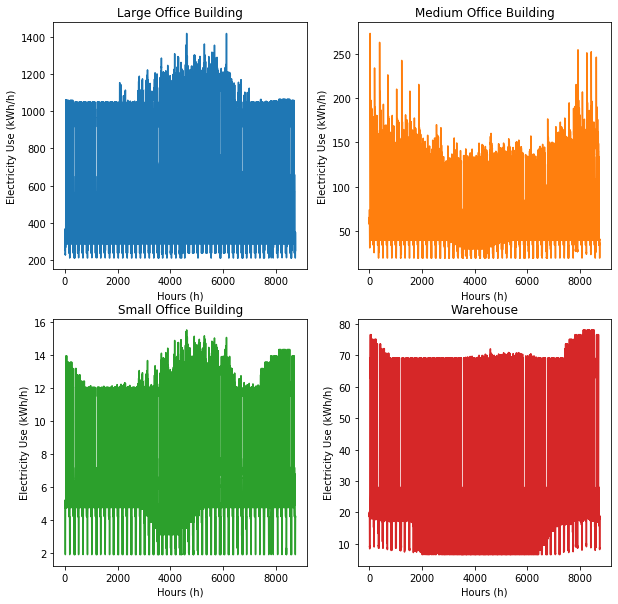

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Some example data to display
x = buildings[0].hourly_electricity.index

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(x,buildings[0].hourly_electricity)
axs[0, 0].set_title('Large Office Building')
axs[0, 1].plot(x,buildings[1].hourly_electricity, 'tab:orange')
axs[0, 1].set_title('Medium Office Building')
axs[1, 0].plot(x,buildings[2].hourly_electricity, 'tab:green')
axs[1, 0].set_title('Small Office Building')
axs[1, 1].plot(x,buildings[3].hourly_electricity, 'tab:red')
axs[1, 1].set_title('Warehouse')

for ax in axs.flat:
    ax.set(xlabel='Hours (h)', ylabel='Electricity Use (kWh/h)')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
plt.savefig('paper_images/buildings_hourly_load.png', bbox_inches='tight')

In [41]:
import numpy as np
def bin_electricity(elect):
    night=0
    morning=0
    midday=0
    afternoon=0
    for i in elect.index:
        w=i%24
        if ((w<=6) & (w>19)):
            night+=elect[i]
        elif((w>6) & (w<=11)):
            morning+=elect[i]
        elif((w>11)&(w<=14)):
            midday+=elect[i]
        else:
            afternoon+=elect[i]
    total =sum([night,morning,midday,afternoon])
    print("{:0.2f}, {:0.2f}, {:0.2f}, {:0.2f}".format(night/total,morning/total,midday/total,afternoon/total))
    return night/total,morning/total,midday/total,afternoon/total


In [42]:
for i in [0,1,2,3]:
    bin_electricity(buildings[i].hourly_electricity)


0.00, 0.30, 0.18, 0.52
0.00, 0.30, 0.17, 0.53
0.00, 0.28, 0.17, 0.54
0.00, 0.34, 0.21, 0.44
